In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/kaggle/input/wine-quality-prediction-fall-2024-25-b-1/train.csv') 
print(data.head())


   ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1            7.1              0.29         0.30            16.0   
1   2            6.8              0.23         0.31             2.8   
2   3            7.1              0.39         0.35            12.5   
3   4            6.4              0.17         0.27             9.9   
4   5            6.0              0.31         0.27             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.036                 58.0                 201.0  0.99954  3.30   
1      0.047                 40.0                 122.0  0.99126  3.06   
2      0.044                 26.0                  72.0  0.99410  3.17   
3      0.047                 26.0                 101.0  0.99596  3.34   
4      0.042                 19.0                 120.0  0.98952  3.32   

   sulphates  alcohol  Quality  
0       0.67      9.0        5  
1       0.64     10.9        7  
2       0.29     11.6        

In [3]:
# Handle missing values if any
data.fillna(data.mean(), inplace=True)

# Split features and target
X = data.drop('Quality', axis=1)
y = data['Quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
selector = SelectKBest(score_func=f_classif, k=5)  
X_selected = selector.fit_transform(X_scaled, y)
selected_features = selector.get_support(indices=True)
print("Selected Features:", data.columns[selected_features])


Selected Features: Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n")
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
print("\n")
# Classification Report
print(classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
 [[  0   0   1   0   1   0   0]
 [  0   5   6  13   2   1   0]
 [  0   8 139  75  15   2   0]
 [  2  10  70 199  56  12   0]
 [  0   1  15  56  73   5   0]
 [  0   1   0   6   6   9   0]
 [  0   0   0   0   0   1   0]]


F1 Score: 0.5385454145281938


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.19      0.19        27
           5       0.60      0.58      0.59       239
           6       0.57      0.57      0.57       349
           7       0.48      0.49      0.48       150
           8       0.30      0.41      0.35        22
           9       0.00      0.00      0.00         1

    accuracy                           0.54       790
   macro avg       0.31      0.32      0.31       790
weighted avg       0.54      0.54      0.54       790



In [8]:

test_data = pd.read_csv('/kaggle/input/wine-quality-prediction-fall-2024-25-b-1/test.csv')  

# Preprocess the test data similar to the training data
X_test = test_data
X_test_scaled = scaler.transform(X_test)  # Scale the test data
X_test_selected = selector.transform(X_test_scaled)  # Apply the same feature selection

# Predict using the trained model
test_predictions = clf.predict(X_test_selected)


In [9]:
# Assuming 'id' is a column in your test dataset
submission = pd.DataFrame({
    'ID': test_data['ID'],        # 'id' from the test data
    'Quality': test_predictions   # The predicted 'quality' from the model
})

# Save the submission DataFrame as a CSV file
submission.to_csv('submission.csv', index=False)

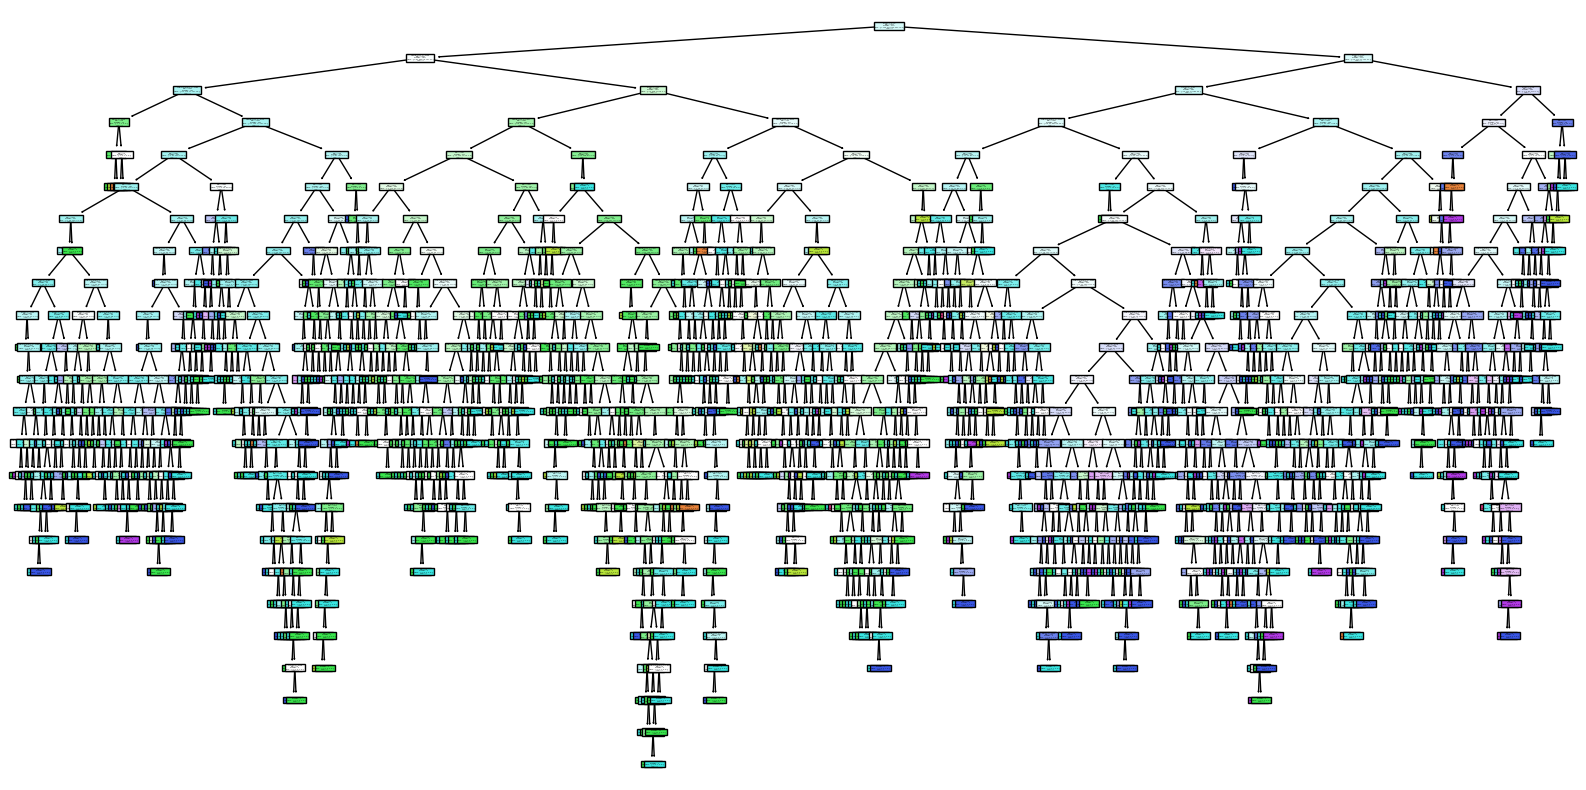

In [10]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data.columns[selected_features], class_names=['3', '4', '5', '6', '7', '8', '9'], filled=True)
plt.show()


## Results and Observations

| Metric           | Value         |
|------------------|---------------|
| F1 Score         | {f1}          |
| Confusion Matrix | See above     |
| Selected Features| volatile acidity, chlorides, total sulfur dioxide, density,alcohol |
| Other Observations| The model performs well on certain quality classes but struggles with overlapping classes like 5 and 6. |

The main evaluation metric was F1-score, which is weighted based on the class imbalance. We used SelectKBest to select the most important features, and the decision tree was plotted to visualize how it makes decisions based on the selected features.
